## Retrieving data from

1P (2018-2021): Solid Earth response of the Patagonia Andes to post-Little Ice Age glacial retreat

https://www.fdsn.org/networks/detail/1P_2018/

station info

http://service.iris.edu/irisws/fedcatalog/1/query?net=1P&starttime=2018-01-01&endtime=2021-12-31&format=text&includeoverlaps=true&nodata=404


In [1]:
#seismology
from obspy import read
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime

#mapping
import cartopy.crs as ccrs
import cartopy

#plotting
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
inventory = client.get_stations(
	network="1P", station="*",
	starttime=UTCDateTime(2020, 4, 9),
	endtime=UTCDateTime(2020, 4, 19)
	)

In [3]:
#print(inventory)

In [4]:
inv_close = client.get_stations(
	network="1P", station="*",
	starttime=UTCDateTime(2020, 4, 9),
	endtime=UTCDateTime(2020, 4, 19),
    latitude=-49.0,
    longitude=-73.9, 
    maxradius=1)

In [5]:
print(inv_close)

Inventory created at 2022-03-14T06:08:14.371000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2020-04-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			1P
		Stations (5):
			1P.EHEL (Estancia Helsingfors, Patagonia, Argentina)
			1P.ELCH (El-Chalten, Patagonia, Argentina)
			1P.OHRS (Chilean Fiord, Patagonia, Chile)
			1P.PEN2 (Chilean Fiord, Patagonia, Chile)
			1P.PTOE (Chilean Fiord, Patagonia, Chile)
		Channels (0):



/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


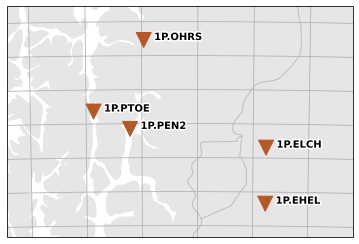

In [6]:
inv_close.plot(projection='local', label=True);

In [28]:
ts=UTCDateTime("2020-04-09T00:00:00") # start time
te=UTCDateTime("2020-04-09T00:20:00") # end time

## Extract data from IRIS

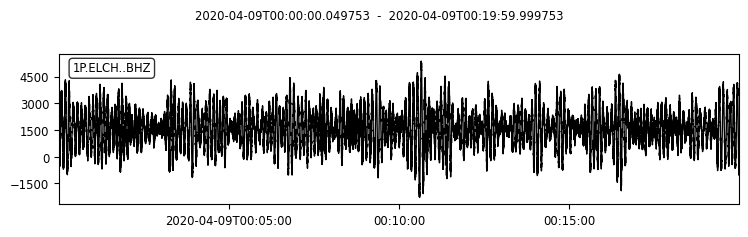

In [33]:
st = client.get_waveforms("1P", "ELCH", "*", "BHZ", ts, te)
st.plot();